### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Bank cust Data

# 1. Importing Libraries & data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [4]:
path=r'C:\Users\sruth\OneDrive\Desktop\Career Foundry\Data Immersion\A6-Advanced Analytics & Dashboard design\6.6 Sourcing & Analyzing Time Series Data'

In [5]:
# Importing the data
df_bank = pd.read_csv(os.path.join(path, 'Data','Prepared data','Bank Transactions2.csv'))

In [6]:
df_bank.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,month of transaction,Trans_monthname,Month_spend,Age_Group,Age_Category,State
0,T3,C4417068,1996-11-26,F,Mumbai,17874.44,2016-02-08,15:38:32,459.0,26,2,Feb,Low spending Month,26-35,Low spenders,Maharashtra
1,T4,C5342380,1973-09-14,F,Mumbai,866503.21,2016-02-08,15:38:34,2060.0,50,2,Feb,Low spending Month,45+,Medium spenders,Maharashtra
2,T5,C9031234,1988-03-24,F,Mumbai,6714.43,2016-02-08,02:19:16,1762.5,35,2,Feb,Low spending Month,26-35,High spenders,Maharashtra
3,T7,C7126560,1992-01-26,F,Mumbai,973.46,2016-02-08,00:16:46,566.0,31,2,Feb,Low spending Month,26-35,High spenders,Maharashtra
4,T8,C1220223,1982-01-27,M,Mumbai,95075.54,2016-02-08,23:22:17,148.0,41,2,Feb,Low spending Month,36-45,Medium spenders,Maharashtra


In [15]:
# create a subset wuth transaction id,cust is and tran date
df_bank_sub= df_bank[['TransactionDate','TransactionID']]

In [16]:
df_bank_sub.head()

,TransactionDate,TransactionID
0,2016-02-08,T3
1,2016-02-08,T4
2,2016-02-08,T5
3,2016-02-08,T7
4,2016-02-08,T8


In [26]:
# No of transactions grouped by transation date
df_bank_time=df_bank_sub.groupby('TransactionDate').agg({'TransactionID':['count']})

In [27]:
df_bank_time.head(10)

,TransactionID
,count
TransactionDate,
2016-01-08,13015
2016-01-09,14051
2016-02-08,13248
2016-02-09,14292
2016-03-08,12969
2016-03-09,17033
2016-04-08,13024
2016-04-09,16917


In [28]:
df_bank_time.shape

(55, 1)

In [29]:
df_bank_time.columns

MultiIndex([('TransactionID', 'count')],
           )

In [30]:
type(df_bank_time)

pandas.core.frame.DataFrame

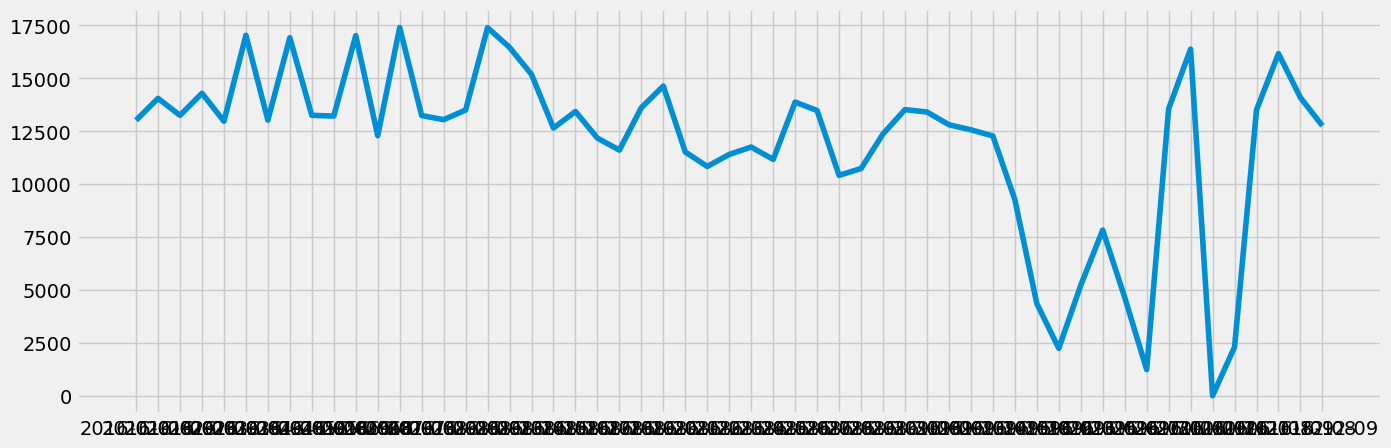

In [31]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here.

plt.plot(df_bank_time)

# 2. Subsetting, wrangling, and cleaning time-series data

In [32]:
# Reset index so that you can use the "Transaction Date" column as a filter

df_bank_time2 = df_bank_time.reset_index()

In [33]:
df_bank_time2.head()

,TransactionDate,TransactionID
,,count
0,2016-01-08,13015
1,2016-01-09,14051
2,2016-02-08,13248
3,2016-02-09,14292
4,2016-03-08,12969


In [34]:
df_bank_time2.shape

(55, 2)

In [ ]:
# Set the "Transaction Date" column as the index

from datetime import datetime

df_bank_time2['datetime'] = pd.to_datetime(df_bank_time2['TransactionDate']) # Create a datetime column from "TransactionDate.""
df_bank_time2 = df_bank_time2.set_index('datetime') # Set the datetime as the index of the dataframe.
df_bank_time2.drop(['TransactionDate'], axis=1, inplace=True) # Drop the "TransactionDate" column.
df_bank_time2.head()

In [37]:
df_bank_time2.head(20)

,TransactionID
,count
datetime,
2016-01-08,13015
2016-01-09,14051
2016-02-08,13248
2016-02-09,14292
2016-03-08,12969
2016-03-09,17033
2016-04-08,13024
2016-04-09,16917


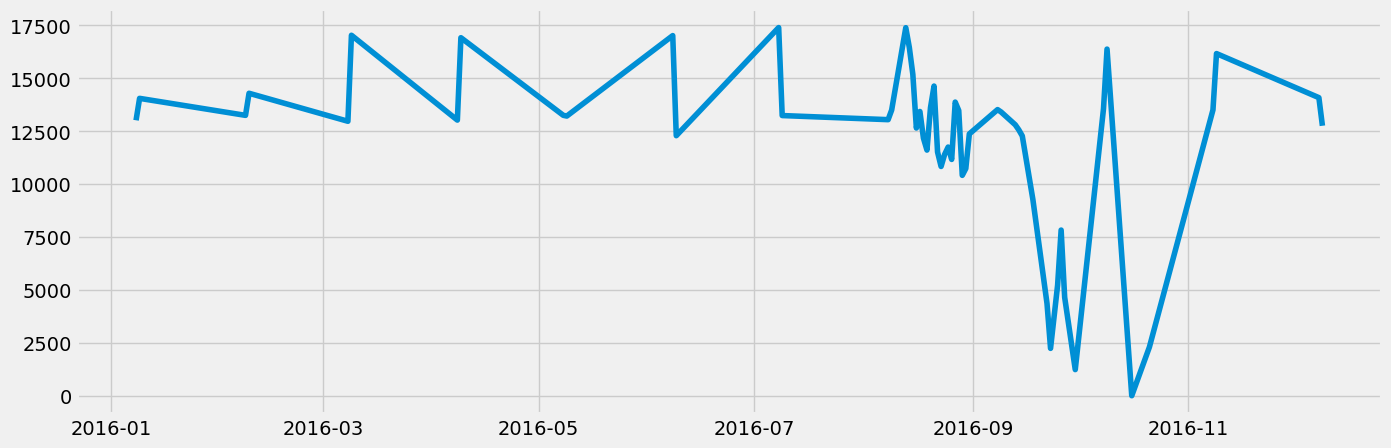

In [38]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_bank_time2)

In [39]:
# Check for missing values 

df_bank_time2.isnull().sum() 

TransactionID  count    0
dtype: int64

In [41]:
# Check for duplicates

dups = df_bank_time2.duplicated()
dups.sum()

0

# 3. Time-series analysis: decomposition

In [76]:
# Decompose the time series using an multiplicative model
decomposition = sm.tsa.seasonal_decompose(df_bank_time2, model='Multiplicative',period=2)


In [77]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

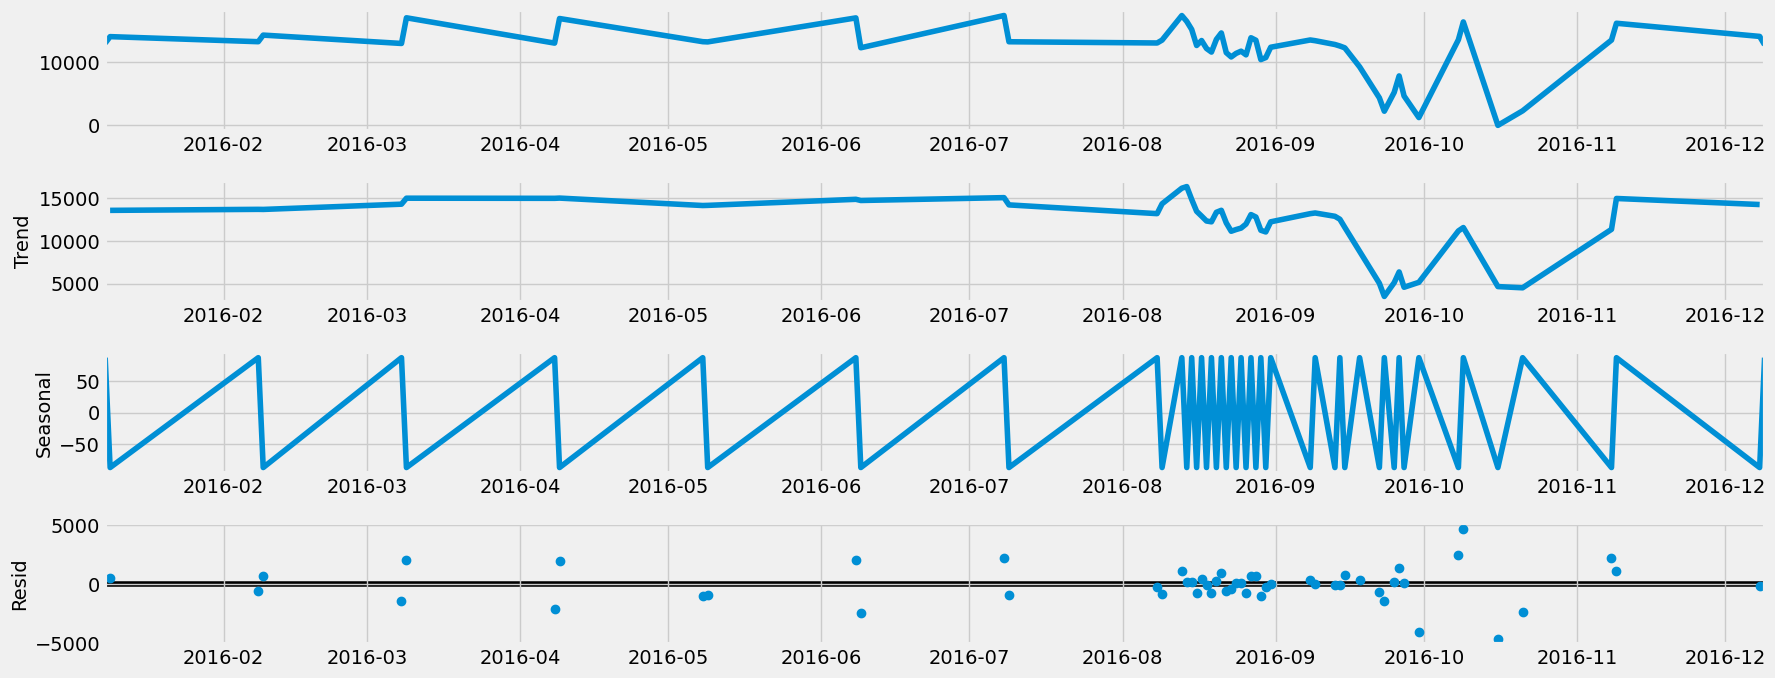

In [78]:
# Plot the separate components

decomposition.plot()
plt.show()

# 4. Testing for stationarity

In [ ]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_bank_time2['TransactionID'])

## In the Dickey-Fuller test, Test Statistic is larger than the Critical Value.Based on these results,we can't reject the null hypothesis and the data is not stationary.

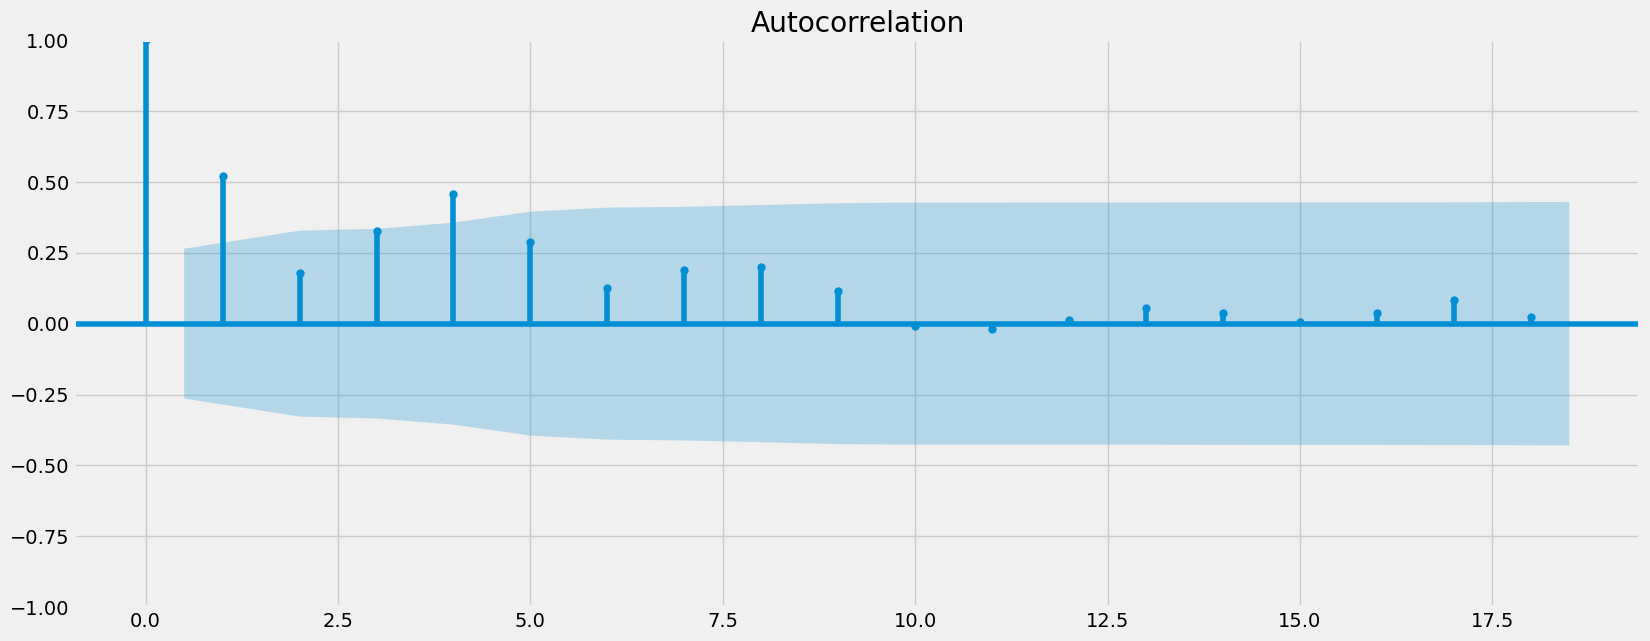

In [84]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_bank_time2)
plt.show()

# 5. Stationarizing the data

In [85]:
data_diff = df_bank_time2 - df_bank_time2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [86]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [87]:
data_diff.head()

,TransactionID
,count
datetime,
2016-01-09,1036.0
2016-02-08,-803.0
2016-02-09,1044.0
2016-03-08,-1323.0
2016-03-09,4064.0


In [88]:
data_diff.columns

MultiIndex([('TransactionID', 'count')],
           )

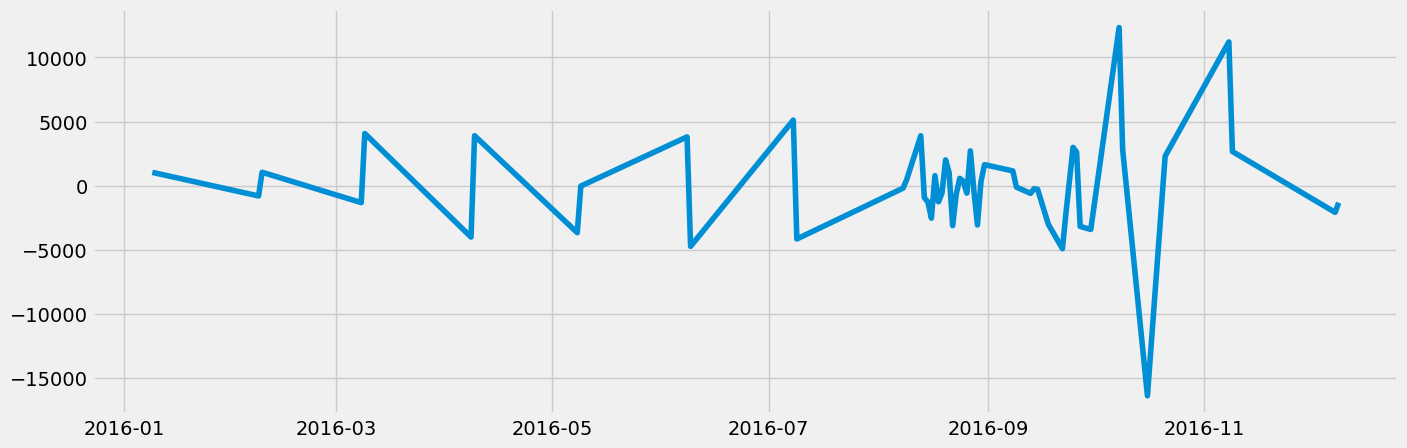

In [89]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [90]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -9.825872e+00
p-value                        5.189813e-17
Number of Lags Used            1.000000e+00
Number of Observations Used    5.200000e+01
Critical Value (1%)           -3.562879e+00
Critical Value (5%)           -2.918973e+00
Critical Value (10%)          -2.597393e+00
dtype: float64


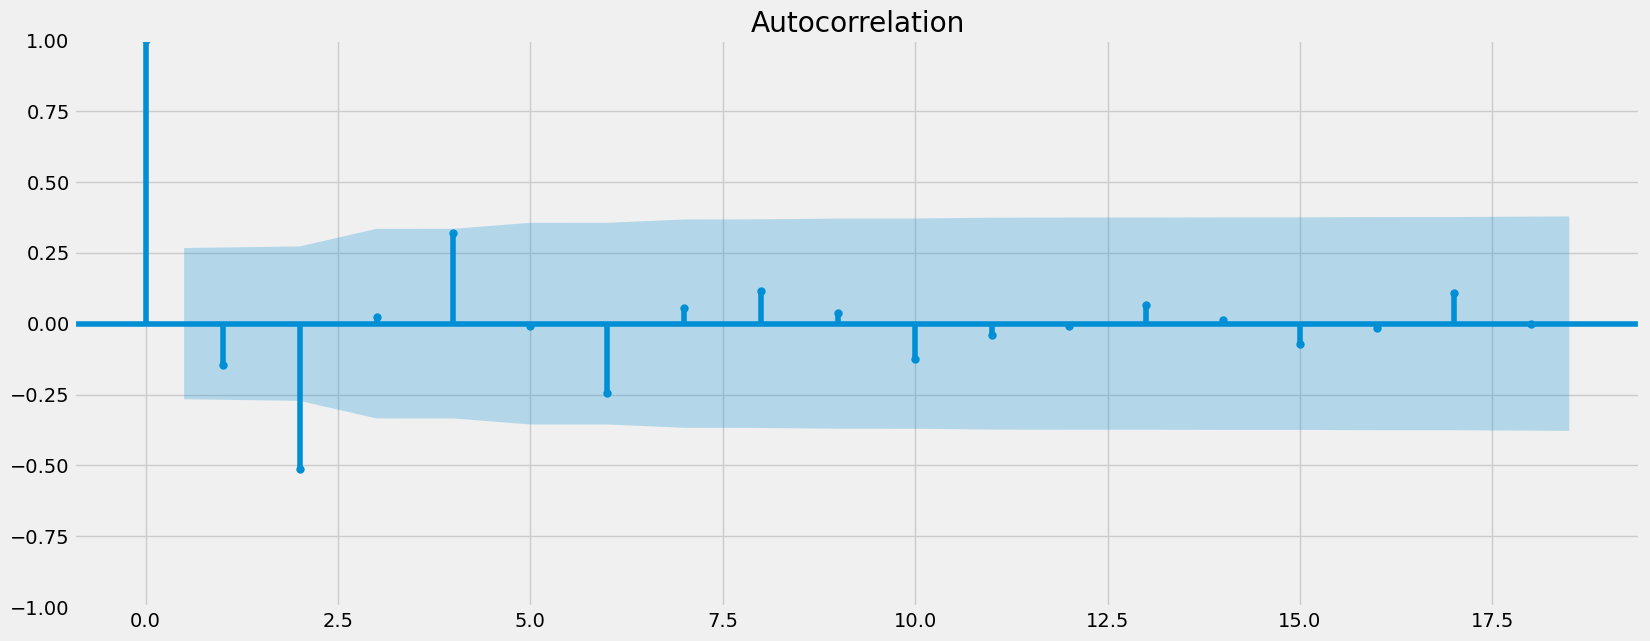

In [91]:
plot_acf(data_diff)
plt.show()

## In the Dickey-Fuller test, Test Statistic is smaller than the Critical Value.Based on these results,we can reject the null hypothesis and the data is now stationary.